# Projeto 1 Ciência dos Dados

Stefano Moretti 2C

Análise exploratória das relações entre as variáveis: IDH, Número de pessoas no Exército de um país e Valor gasto em importações de armas no ano de 2000

# Pergunta : Como os diferentes indices de importação de armas e a quantidade de pessoas em serviço militar tem relação com o IDH de um país?'

In [2]:
import pandas as pd
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
arm_imports = pd.read_excel('Arms_imports.xlsx')
army_total = pd.read_excel('indicator_army_total.xlsx')
idh = pd.read_excel('Indicator_HDI.xlsx')

In [4]:
army2000 = army_total[[2000,'Country']]
army_idx = army2000
army1 = army_idx.set_index('Country')
army1.head()

,2000
Country,
Afghanistan,400000.0
Albania,67500.0
Algeria,305200.0
Angola,117500.0
Antigua and Barbuda,200.0


In [5]:
#imports = arm_imports.loc[:,['Arm imports (constant 1990 US$)','2000']]
#imports_idx = imports.set_index('Country')
#imports_idx
armimp2000 = arm_imports[[2000,'Country']]
imp_idx = armimp2000
imp1 = imp_idx.set_index('Country')
imp1.head()

,2000
Country,
Afghanistan,NaN
Albania,NaN
Algeria,415000000.0
American Samoa,NaN
Andorra,NaN


In [6]:
idh_2000 = idh[[2000,'HDI']]
idh_idx = idh_2000
idh1 = idh_idx.set_index('HDI')
idh1.head()

,2000
HDI,
Abkhazia,NaN
Afghanistan,0.230
Akrotiri and Dhekelia,NaN
Albania,0.691
Algeria,0.624


In [7]:
ArmyMil = imp1.join(army1, how='inner', lsuffix='_Imports' , rsuffix='_Army')
ArmyMil.head()

,2000_Imports,2000_Army
Country,,
Afghanistan,NaN,400000.0
Albania,NaN,67500.0
Algeria,415000000.0,305200.0
Angola,145000000.0,117500.0
Antigua and Barbuda,NaN,200.0


In [8]:
fdata = ArmyMil.join(idh1,how='inner', rsuffix='_IDH')
fdata.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
fdata.columns = ['Imports','Army','IDH']
fdata.head()

,Imports,Army,IDH
Algeria,415000000.0,305200.0,0.624
Angola,145000000.0,117500.0,0.384
Argentina,208000000.0,102300.0,0.749
Australia,399000000.0,51600.0,0.906
Austria,25000000.0,40500.0,0.839


# Dataframe concluido com a limpeza dos dados incompletos

## Análise da relação entre IDH e Número de pessoas no exército


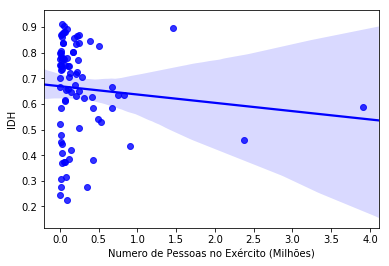

In [9]:
#plt.scatter(fdata['Army']/1000000,fdata['IDH'])
sns.regplot(fdata['Army']/1000000,fdata['IDH'], color =('blue'))
plt.ylabel('IDH')
plt.xlabel('Numero de Pessoas no Exército (Milhões)')
plt.show()

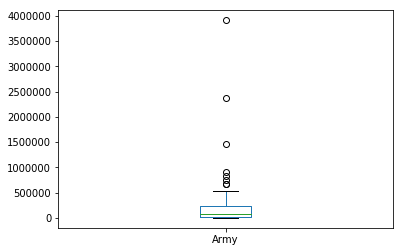

In [10]:
fdata["Army"].plot.box(logy=False)

In [11]:
fdata['Army'].describe()

count    8.500000e+01
mean     2.489576e+05
std      5.271998e+05
min      1.100000e+03
25%      2.180000e+04
50%      8.830000e+04
75%      2.405000e+05
max      3.910000e+06
Name: Army, dtype: float64


### Após a construção do gráfico é possível perceber uma grande quantidade de outliers, uma seleção dos dados (Exércitos com menos de 500 mil pessoas) foi feita para melhor análise dos pontos apresentados.

In [12]:
dataarmy = fdata[fdata.Army<500000]
dataarmy.head()

,Imports,Army,IDH
Algeria,415000000.0,305200.0,0.624
Angola,145000000.0,117500.0,0.384
Argentina,208000000.0,102300.0,0.749
Australia,399000000.0,51600.0,0.906
Austria,25000000.0,40500.0,0.839


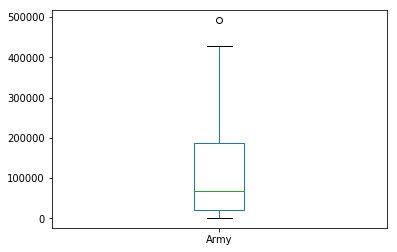

In [13]:
dataarmy["Army"].plot.box(logy=False)

- Com a nova construção do boxplot, o número de outliers foi reduzido para quase zero e os valores estão mais proximos da média com uma tendencia para a esquerda.

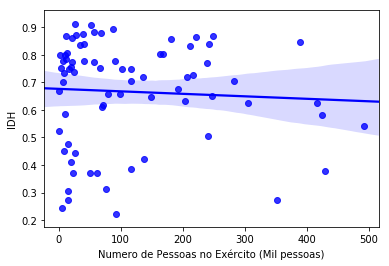

In [28]:
sns.regplot(dataarmy['Army']/1000,dataarmy['IDH'], color =('blue'))
plt.ylabel('IDH')
plt.xlabel('Numero de Pessoas no Exército (Mil pessoas)')
plt.show()

In [15]:
dataarmy.corr(method='pearson', min_periods=1)

,Imports,Army,IDH
Imports,1.000000,0.241827,0.355444
Army,0.241827,1.000000,-0.058309
IDH,0.355444,-0.058309,1.000000


- É possível perceber uma melhora significativa na amostra de dados, o que faz perceber que não há uma boa correlação entre os dados e que a quantidade de pessoas no exército de um país não afeta diretamente o IDH.

## Análise da relação entre IDH e Investimento anual em importação de armas


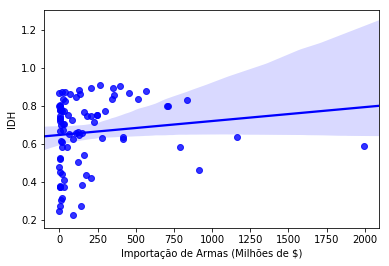

In [16]:
#plt.scatter(fdata['Imports']/1000000,fdata['IDH'])
sns.regplot(fdata['Imports']/1000000,fdata['IDH'], color =('blue'))
plt.ylabel('IDH')
plt.xlabel('Importação de Armas (Milhões de $)')
plt.show()

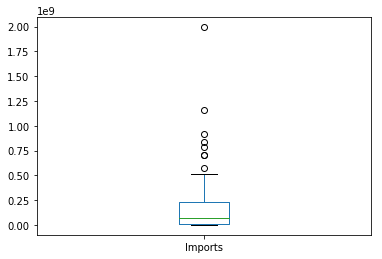

In [17]:
fdata["Imports"].plot.box(logy=False)

In [18]:
fdata['Imports'].describe()

count    8.500000e+01
mean     1.885529e+08
std      3.086335e+08
min      0.000000e+00
25%      1.000000e+07
50%      6.800000e+07
75%      2.270000e+08
max      1.994000e+09
Name: Imports, dtype: float64


### Da mesma forma, a quantidade de outliers é irrelevante para a análise da grande massa e uma seleção dos dados foi feita para melhores conclusões (Investimentos menores de 500 milhões de dólares por ano).

In [19]:
dataimp = fdata[fdata.Imports<500000000]
dataimp.head()

,Imports,Army,IDH
Algeria,415000000.0,305200.0,0.624
Angola,145000000.0,117500.0,0.384
Argentina,208000000.0,102300.0,0.749
Australia,399000000.0,51600.0,0.906
Austria,25000000.0,40500.0,0.839


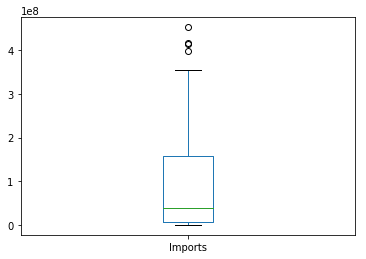

In [20]:
dataimp["Imports"].plot.box(logy=False)

- O número de valores abaixo da mediana segue alto, porém a análise será mais precisa sem a presença de tantos outliers.

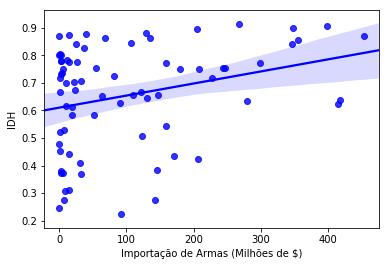

In [26]:
sns.regplot(dataimp['Imports']/1000000,dataimp['IDH'], color =('blue'))
plt.ylabel('IDH')
plt.xlabel('Importação de Armas (Milhões de $)')
plt.show()

In [27]:
dataimp.corr(method='pearson', min_periods=1)

,Imports,Army,IDH
Imports,1.000000,0.384506,0.287590
Army,0.384506,1.000000,0.015495
IDH,0.287590,0.015495,1.000000


- Da mesma forma, após a limpeza dos outliers ainda é muito baixa a correlação entre os dados e não se pode concluir que há influência direta entre o IDH de um país e o valor gasto por ano na importação de armas.

##  Análise da relação entre investimento anual em importação de armas e número de pessoas no exército de um país

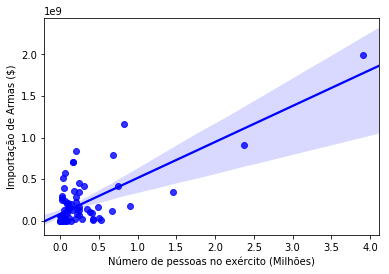

In [22]:
#plt.scatter(fdata['Army']/1000000,fdata['Imports'])
sns.regplot(fdata['Army']/1000000,fdata['Imports'], color =('blue'))
plt.xlabel('Número de pessoas no exército (Milhões)')
plt.ylabel('Importação de Armas ($)')
plt.show()

In [23]:
ArmyMil.corr(method='pearson', min_periods=1)

,2000_Imports,2000_Army
2000_Imports,1.00000,0.68937
2000_Army,0.68937,1.00000


In [24]:
fdata.corr(method='pearson', min_periods=1)

,Imports,Army,IDH
Imports,1.000000,0.739267,0.123169
Army,0.739267,1.000000,-0.093063
IDH,0.123169,-0.093063,1.000000


A partir da análise dos dados e dos índices de correlação que foram elaborados com a seguinte amostra de países no ano de 2000, é possível concluir que o número de pessoas no exército de cada país não possui nenhuma correlação com os indices elevados de IDH. Em alguns países como os Estados Unidos é possível perceber que esta quantidade é sim elevada mas não é o único fator limitante para o alto desenvolvimento do país. A maioria dos países que possuem muitas pessoas em seu exército são países de baixa renda e baixo IDH, como China, Índia, Paquistão, entre outros.

Em relação às importações de armas feitas no ano de 2000, é possível perceber novamente o destaque dos Estados Unidos e seus índices: Um dos países com o maior IDH do mundo importa tão pouco perto de seu poder armamentista e monetário. Isso se da ao fato de que este país não depende de importação de armas e logo, fabrica suas próprias. Os países que mais importam armas são China, Índia e Turquia, estes são países que se encontram em conflito constante com outras partes do mundo tanto por questões políticas (Turquia e sua guerra contra o povo Curdo) como por questões geográficas (China e Índia na região da Cashmira), porém não possuem as tecnologias necessárias para a fabricação destes produtos, logo dependem de altos investimentos na importação de armas. Podemos encontrar também, países de desenvolvimento altíssimo na lista de maiores importadores, como Austrália, Reino Unido, Singapura, Japão e Canada.

Além disso, ao tratar do gráfico da relação entre o número de pessoas no exército e o valor da importação de armamentos, podemos evidenciar que países como a China e Índia, possuem investimentos altíssimos e exércitos super numerosos e isso não os torna páises melhor desenvolvidos. A maior parte dos países que possuem um IDH elevado possuem seus dados em um meio termo do investimento em armamentos importados e quantidade de pessoas no setor militar. Isso se explica no último gráfico a maior parte dos pontos estarem perto da origem e que os que se distaciam da massa maior, são aqueles que possuem níveis elevados de desigualdade social.
